## Visualizacion de datos con reduccion de dimensiones usando t-SNE

Para este NoteBook ajustaremos un modelo de t-SNE para visualizar los datos n-dimesionales en una grafica de 2 dimensiones que mantenga la mayor cantidad de informacion sobre los datos.

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../data/processed_data.csv')
df = df.drop('Unnamed: 0', axis=1)

selected_cols = ['Gender', 'Age', 'Sleep Duration', 
                 'Stress Level', 'BMI Category', 'Heart Rate', 'Sleep Disorder']

X = df[selected_cols]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

tsne = TSNE()
tsne.fit(data_scaled)
X_trans_tsne = tsne.fit_transform(data_scaled)
X_trans_tsne = X_trans_tsne.transpose()

normalized_quality = (df['Quality of Sleep'] - df['Quality of Sleep'].min()) / df['Quality of Sleep'].max()

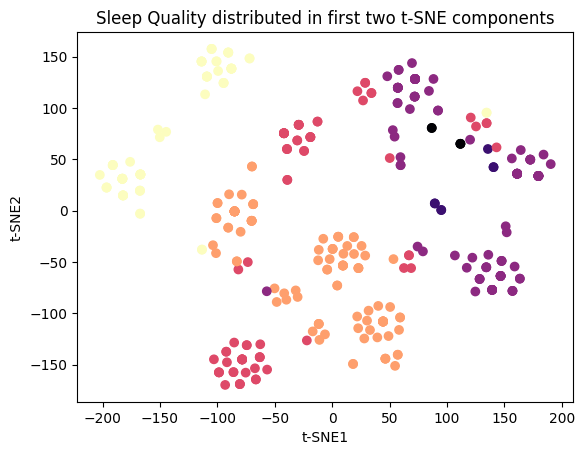

In [5]:
plt.scatter(X_trans_tsne[0], X_trans_tsne[1], c=normalized_quality)
plt.title('Sleep Quality distributed in first two t-SNE components')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.magma()
plt.savefig('../graphics/TSNE_Vis.png')
plt.show()